# Intro

---
LogisticsRegression is a *** classification***  ML model that predict the possibility of an event would happen (or not)  based on ***threshold***
- 0 or 1 ( 2 group case)
- a, b, c ... (multiple groups cases)

---

Here we define logistics function as 
$$
\begin{equation}
logistics(p)=\log\frac{p}{1-p}\ 
\end{equation}
$$


p : possibility  of an event would happen 


Based on "threshold". Set ***p*** within $0<p<1$ as possibility, then the *** odds ratio *** $\frac{p}{1-p}$ can be obtained. Via the odds ratio we can know the ratio of the interest possibility.

Notice the $logistics(p)$ will > 0 if p > 0.5 and < 0 while p < 0.5,
this can be a property that make LogisticsRegression be able to do classication with certain threshold.

---

Here we do tricks get **sigmoid function** which can tell the probability 
of an event happen or not via logistics function :


$$
\begin{equation}
\begin{split}
z &= \log\frac{p}{1-p} \\
e^{-z}&=\frac{1}{p}-1 \\
p &= \frac{1}{1+e^{z}}\
\end{split}
\end{equation}
$$



Make $\phi(z)$  as $p$ as an  objactive function
$$
\begin{equation}
\phi(z) = \frac{1}{1+e^{z}}\ 
\end{equation}
$$

Notice that with some given z make $\phi(z)$ > 0.5  then we can 
say this event is going to happen (not happen) possibly. 
***z*** is the thing would be learned during model training. 


fitting data via logistics regression 
(via the S shape sigmoid function)   



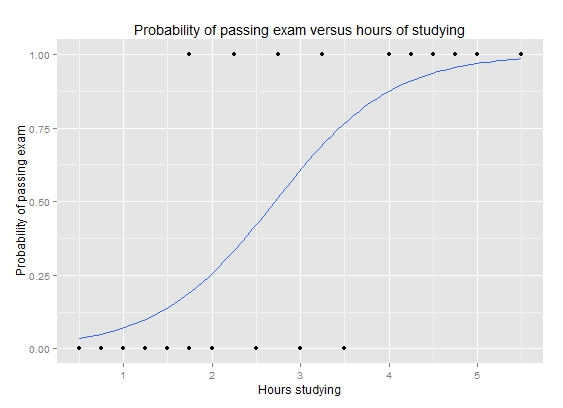

In [43]:
from IPython.display import Image
print ("""fitting data via logistics regression 
(via the S shape sigmoid function)   
""")
Image(filename='logistics_demo.jpeg') 


In [55]:
# import analysis library
import pandas as pd, numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
plt.style.use('ggplot')
# ML
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


In [32]:
# credit 
# http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%202%20-%20Logistic%20Regression.ipynb#Logistic-regression-hypothesis


In [34]:
# define sigmoid function 
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [37]:
x = np.arange(-10,10)
y = sigmoid(x)
# take a view of sigmoid
#plt.plot(x,y)
#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('sigmoid function')

- 
$h_\theta\ (x^{(i)}) =  \phi(z)$ 



-  Cost Function
 $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
 
 
- Vectorized Cost Function
 $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$


- Partial derivative

 $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
 
- Vectorized Partial derivative

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$ 

- Only run the non-vectorize version in this nb

# Quick fitting 

In [49]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print (set(y))

{0, 1, 2}


In [61]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std,X_test_std ,X_train, X_test, y_train, y_test

def logistics_fit(X,y):
    logistics = LogisticRegression() 
    logistics.fit(X, y)
    return logistics


In [63]:
X_train_std,X_test_std,X_train, X_test, y_train, y_test = data_preprocess(X,y)


In [64]:
logistics_ = logistics_fit(X_train_std, y_train)

In [84]:
print ('input data : ')
print (X_test_std[10,:])
print ('predict probability : ')
print (logistics_.predict_proba(X_test_std[10,:]))

input data : 
[-1.3401922  -1.31435097]
predict probability : 
[[  8.08685733e-01   1.91040537e-01   2.73729559e-04]]


//anaconda/envs/g_dash/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


For the input data, the logistics model predict there is 
-  80% probability the data is group 0
- 19% probability the data is group 1
- 0.0002% probability the data is group 2


In [85]:
print ('input data : ')
print (X_test_std[10,:])
print ('predict probability : ')
print (logistics_.predict(X_test_std[10,:]))

input data : 
[-1.3401922  -1.31435097]
predict probability : 
[0]


//anaconda/envs/g_dash/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [94]:
# dev 
# http://rstudio-pubs-static.s3.amazonaws.com/230133_fb9cb3c35ca345d0b9e5726ed3f45a21.html


# L1 Regularization

# L2 Regularization

In [95]:
##############

In [6]:
# define cost function 
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

# define gradient method 
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [7]:
#np.random.randint(30,size=10)
#np.random.random_integers(0,1,size=10)

In [8]:
#x.shape([1])
toydata = pd.DataFrame({'a':np.random.randint(10,30,size=30),
                        'b':np.random.randint(40,50,size=30),
                        'c':np.random.random_integers(0,1,size=30)})

//anaconda/envs/g_dash/lib/python3.4/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  after removing the cwd from sys.path.


In [9]:
toydata.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
a,28,24,13,23,16,17,12,16,21,19,...,10,20,21,29,14,21,10,18,20,28
b,43,47,40,47,40,43,45,41,44,47,...,43,42,40,46,46,40,47,42,49,41
c,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [10]:
x = np.array(toydata.iloc[:,:2])
y =  np.array(toydata.iloc[:,2:])

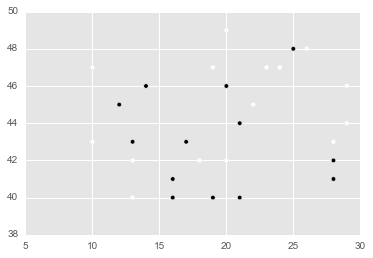

In [11]:
plt.scatter(toydata.a,toydata.b,c=toydata.c)

In [12]:
# let's run toy data with costfunction and gradient function
initial_theta = np.zeros(x.shape[1])
cost = costFunction(initial_theta, x, y)
grad = gradient(initial_theta, x, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [ 1.65        3.33333333]


### Optimize cost function

In [13]:
from scipy.optimize import minimize
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.minimize.html
res = minimize(costFunction, initial_theta, args=(x,y), method=None, jac=gradient, options={'maxiter':400})
res

      fun: 0.6804054820575545
 hess_inv: array([[ 0.13268925, -0.06001118],
       [-0.06001118,  0.02925761]])
      jac: array([  1.10104879e-06,   1.74732876e-06])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([-0.01806774,  0.00125377])

### Predict 

In [14]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [15]:
#x

In [16]:
# let's test the simple preidct with new import : [1,45], [85,45]
# Predict using the optimized Theta values from above (res.x)

p = predict(res.x, x) 
print (sigmoid(np.array([1,45]).dot(res.x.T)))
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))
print ('')
print ('---------')
p = predict(res.x, x) 
print (sigmoid(np.array([85,45]).dot(res.x.T)))
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))



0.509586781003
Train accuracy 56.666666666666664%

---------
0.185527344184
Train accuracy 56.666666666666664%


### Decision boundary